In [218]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy.stats as stats
import math

import plotly
import plotly.figure_factory as ff
import statistics                   # mean 
from scipy.stats import ttest_ind   # t-test

df = pd.read_csv('ovarian_cancer.csv')

1. Plot the number of cancer samples and the number of normal samples. How many genes were measured? 

<BarContainer object of 2 artists>

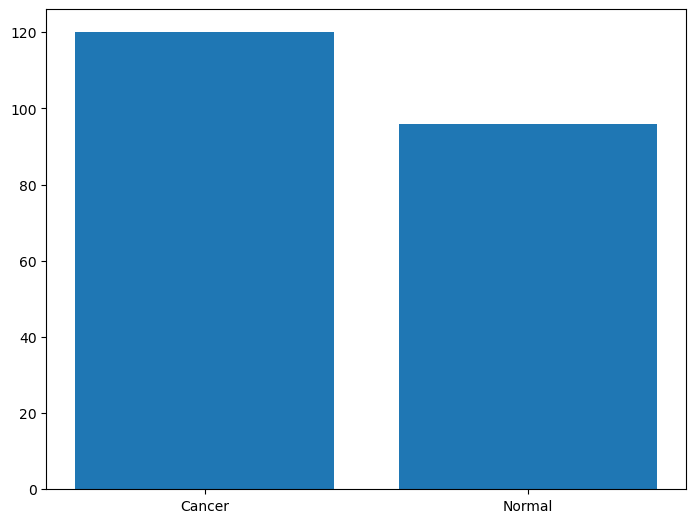

In [219]:
grouped = df.groupby(['status'])
df1 = grouped.get_group("Cancer")
df2 = grouped.get_group("Normal")

tot_cancer = df1.shape[0]
tot_normal = df2.shape[0]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
name = ['Cancer', 'Normal']
tot = [df1.shape[0], df2.shape[0]]
ax.bar(name,tot)

How many genes were measured? 

2. Plot distributions of gene_1 for cancer and normal samples:

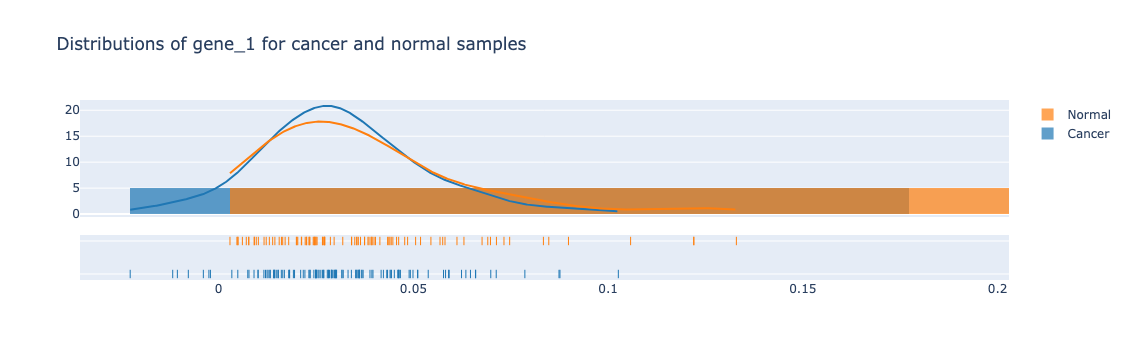

In [220]:
X = df1.gene_1.to_numpy()
Y = df2.gene_1.to_numpy()
hist_data = [X, Y]
group_labels = ['Cancer', 'Normal']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.update_layout(title_text='Distributions of gene_1 for cancer and normal samples')
fig.show()

Calculate the log2 fold change of gene_1 between cancer and normal sample means 

In [221]:
cancer_mean = statistics.mean(df1.gene_1) # cancer sample means
normal_mean = statistics.mean(df2.gene_1) # normal sample means
# log2 fold change of gene_1 between cancer and normal sample means
l2fc = np.log2(np.nan_to_num(np.divide(cancer_mean, normal_mean), nan=1))
print("the log2 fold is")
display(l2fc)

the log2 fold is


-0.23802293718285011

 Plot distributions of gene_3002 for cancer and normal samples

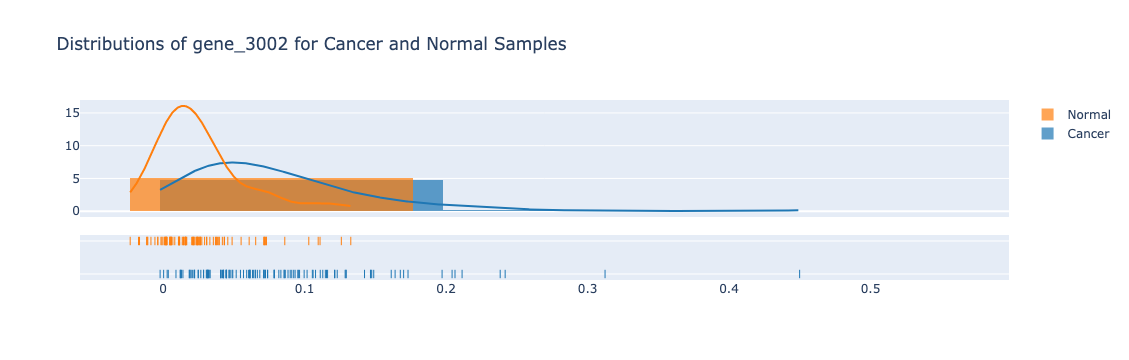

In [222]:
X = df1.gene_3002.to_numpy()
Y = df2.gene_3002.to_numpy()
hist_data = [X, Y]
group_labels = ['Cancer', 'Normal']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.update_layout(title_text='Distributions of gene_3002 for Cancer and Normal Samples')
fig.show()

In [223]:
cancer_mean_2 = statistics.mean(df1.gene_3002) # cancer sample means
normal_mean_2 = statistics.mean(df2.gene_3002) # normal sample means
# log2 fold change of gene_1 between cancer and normal sample means
l2fc_2 = np.log2(np.nan_to_num(np.divide(cancer_mean_2, normal_mean_2), nan=1))
print("the log2 fold")
display(l2fc_2)

the log2 fold


1.6255639181537598

a) Use the t-test to determine if there is a significant difference between the means of cancer and normal groups for gene_1 and gene_3002. State the log2 fold changes and the pvalues for each gene. 

In [224]:
t_gene1 = ttest_ind(df1.gene_1, df2.gene_1)
display(t_gene1)

Ttest_indResult(statistic=-1.7501709816564117, pvalue=0.08152199430351342)

In [225]:
t_gene2 = ttest_ind(df1.gene_3002, df2.gene_3002)
display(t_gene2)

Ttest_indResult(statistic=7.379612834453349, pvalue=3.4629258618496455e-12)

In [226]:
mean1 = np.mean(t_gene1)
mean2 = np.mean(t_gene2)
m = np.array(mean2, mean1)
res = np.log2(m, out=np.zeros_like(m), where=(m!=0))
print("State the log2 fold changes:")
display(res)

State the log2 fold changes:


array(1.88354513)

 Use the Mann-Whitney-Wilcoxon test  to determine if there is a significant difference between the means of cancer and normal groups for gene_1 and gene_3002. State the log2 fold changes and the pvalues for each gene. 

In [227]:
m_gene1 = stats.mannwhitneyu(x=df1.gene_1, y=df2.gene_1, alternative = 'two-sided')

In [228]:
m_gene2 = stats.mannwhitneyu(x=df1.gene_3002, y=df2.gene_3002, alternative = 'two-sided')

In [229]:
mean3 = np.mean(m_gene1)
mean4 = np.mean(m_gene2)
m_2 = np.array(mean4, mean3)
res_2 = np.log2(m_2, out=np.zeros_like(m), where=(m!=0))
print("State the log2 fold changes:")
display(res_2)

State the log2 fold changes:


array(12.19398729)

c) Discuss the results of these tests. Assume that the significance threshold is when pvalue> 0.05.